<a href="https://colab.research.google.com/github/sirat98/sentiment-analysis/blob/main/Omicron_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_df=pd.read_csv("/content/omicron.csv")
train_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0.0,0.0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0.0,0.0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0.0,0.0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2.0,1.0,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0.0,0.0,False


In [5]:
train_df.isnull().sum()

id                     0
user_name              0
user_location        928
user_description     369
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2319
source                 1
retweets               1
favorites              1
is_retweet             1
dtype: int64

In [6]:
train_df['user_location']=train_df['user_location'].fillna(0)
train_df['user_description']=train_df['user_description'].fillna(0)
train_df['hashtags']=train_df['hashtags'].fillna(0)

In [7]:
train_df.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              1
retweets            1
favorites           1
is_retweet          1
dtype: int64

In [8]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
train_df["text"] = train_df["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


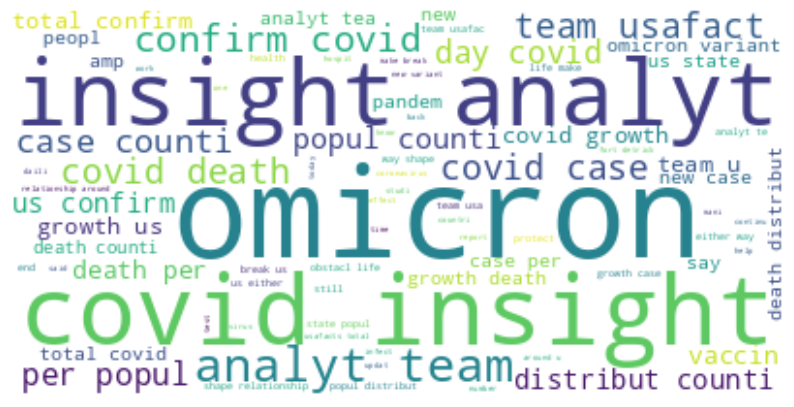

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in train_df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
train_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,daili us confirm covid case counti covid i...,0,smcapplication,0.0,0.0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,yaschamounk cdc say number fulli vaccin omicro...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0.0,0.0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,daili us confirm covid case counti la covi...,0,smcapplication,0.0,0.0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,daili us confirm covid case counti la covi...,0,smcapplication,2.0,1.0,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,winterolymp alreadi underway us olympian look...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0.0,0.0,False


In [13]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
train_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in train_df["text"]]
train_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in train_df["text"]]
train_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in train_df["text"]]
data = train_df[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  Positive  Negative  \
0  daili us confirm covid case counti     covid i...     0.000       0.0   
1  yaschamounk cdc say number fulli vaccin omicro...     0.126       0.0   
2  daili us confirm covid case counti la     covi...     0.000       0.0   
3  daili us confirm covid case counti la     covi...     0.000       0.0   
4   winterolymp alreadi underway us olympian look...     0.000       0.0   

   Neutral  
0    1.000  
1    0.874  
2    1.000  
3    1.000  
4    1.000  


In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
